# Import Library

In [45]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Evaluation Metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

## Split dataset
from sklearn.model_selection import train_test_split

## Model and Param Tuning
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


# Data Preparation

In [2]:
# Import Dataset
dataset = pd.read_excel("Dataset_Final.xlsx")
dataset = dataset.drop({'Nama Sungai', 'Lokasi Sampel', 'Waktu Pengambilan Sampel'}, axis = 1)
dataset.head()

,Residu Terlarut/TDS (Mg/L),Residu Tersuspensi/TSS (Mg/L),pH,BOD,COD,DO,Total Fosfat/ P (Mg/L),NH3-N (Mg/L),Fecal Coli (Jml/100 Ml),Total Coli (Jml/100 Ml),...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,82.1,"<2,5",6.70,4.00,<40,4.83,0.702,NaN,2400,3500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110.8,164,6.85,4.12,31,5.71,0.23,0.41,TNTCC,TNTCC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54.2,15,7.28,8.00,<40,4.03,0.197,NaN,>24000,>24000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120.7,52,6.92,2.98,32,6.95,0.25,0.223,66000,66000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50.5,"<2,5",6.94,8.00,<40,3.22,1.845,NaN,>24000,>24000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Deciding the main dataframe
dataframe = dataset.iloc[:,0:12]
dataframe.head()

,Residu Terlarut/TDS (Mg/L),Residu Tersuspensi/TSS (Mg/L),pH,BOD,COD,DO,Total Fosfat/ P (Mg/L),NH3-N (Mg/L),Fecal Coli (Jml/100 Ml),Total Coli (Jml/100 Ml),Debit,Status
0,82.1,"<2,5",6.70,4.00,<40,4.83,0.702,NaN,2400,3500,0.341,TERCEMAR
1,110.8,164,6.85,4.12,31,5.71,0.23,0.41,TNTCC,TNTCC,0.031,TIDAK TERCEMAR
2,54.2,15,7.28,8.00,<40,4.03,0.197,NaN,>24000,>24000,1.481,TERCEMAR
3,120.7,52,6.92,2.98,32,6.95,0.25,0.223,66000,66000,0.090,TIDAK TERCEMAR
4,50.5,"<2,5",6.94,8.00,<40,3.22,1.845,NaN,>24000,>24000,0.141,TERCEMAR


# Feature Engineering

In [4]:
## Change column name
list(dataframe)
dataframe.rename(columns = {'Fecal Coli (Jml/100 Ml)':'Fecal Coli', 
                    'Residu Terlarut/TDS (Mg/L)':'Residu Terlarut', 
                    'Residu Tersuspensi/TSS (Mg/L)':'Residu Tersuspensi', 
                    'Total Fosfat/ P (Mg/L)' : 'Total Fosfat', 
                    'NH3-N (Mg/L)' : 'NH3-N', 
                    'Total Coli  (Jml/100 Ml)' : 'Total Coli'}, inplace = True)
dataframe.head()

,Residu Terlarut,Residu Tersuspensi,pH,BOD,COD,DO,Total Fosfat,NH3-N,Fecal Coli,Total Coli,Debit,Status
0,82.1,"<2,5",6.70,4.00,<40,4.83,0.702,NaN,2400,3500,0.341,TERCEMAR
1,110.8,164,6.85,4.12,31,5.71,0.23,0.41,TNTCC,TNTCC,0.031,TIDAK TERCEMAR
2,54.2,15,7.28,8.00,<40,4.03,0.197,NaN,>24000,>24000,1.481,TERCEMAR
3,120.7,52,6.92,2.98,32,6.95,0.25,0.223,66000,66000,0.090,TIDAK TERCEMAR
4,50.5,"<2,5",6.94,8.00,<40,3.22,1.845,NaN,>24000,>24000,0.141,TERCEMAR


In [5]:
## Replacing symbols to empty characters
dataframe = dataframe.replace('<', '', regex = True)
dataframe = dataframe.replace('>', '', regex = True)
dataframe = dataframe.replace(',', '.', regex = True)
dataframe.head()

,Residu Terlarut,Residu Tersuspensi,pH,BOD,COD,DO,Total Fosfat,NH3-N,Fecal Coli,Total Coli,Debit,Status
0,82.1,2.5,6.70,4.00,40,4.83,0.702,NaN,2400,3500,0.341,TERCEMAR
1,110.8,164,6.85,4.12,31,5.71,0.23,0.41,TNTCC,TNTCC,0.031,TIDAK TERCEMAR
2,54.2,15,7.28,8.00,40,4.03,0.197,NaN,24000,24000,1.481,TERCEMAR
3,120.7,52,6.92,2.98,32,6.95,0.25,0.223,66000,66000,0.090,TIDAK TERCEMAR
4,50.5,2.5,6.94,8.00,40,3.22,1.845,NaN,24000,24000,0.141,TERCEMAR


In [6]:
## Replace string to NaN (NA Values)
dataframe['Fecal Coli'].replace('TNTCC', np.nan, inplace = True)
dataframe['Total Coli'].replace('TNTCC', np.nan, inplace = True)
dataframe.head()

,Residu Terlarut,Residu Tersuspensi,pH,BOD,COD,DO,Total Fosfat,NH3-N,Fecal Coli,Total Coli,Debit,Status
0,82.1,2.5,6.70,4.00,40,4.83,0.702,NaN,2400,3500,0.341,TERCEMAR
1,110.8,164,6.85,4.12,31,5.71,0.23,0.41,NaN,NaN,0.031,TIDAK TERCEMAR
2,54.2,15,7.28,8.00,40,4.03,0.197,NaN,24000,24000,1.481,TERCEMAR
3,120.7,52,6.92,2.98,32,6.95,0.25,0.223,66000,66000,0.090,TIDAK TERCEMAR
4,50.5,2.5,6.94,8.00,40,3.22,1.845,NaN,24000,24000,0.141,TERCEMAR


In [7]:
## Refactoring Status as 1 and 0
dataframe['Status'].replace({'TERCEMAR' : 1, "TIDAK TERCEMAR" : 0}, inplace = True)
dataframe.head()

,Residu Terlarut,Residu Tersuspensi,pH,BOD,COD,DO,Total Fosfat,NH3-N,Fecal Coli,Total Coli,Debit,Status
0,82.1,2.5,6.70,4.00,40,4.83,0.702,NaN,2400,3500,0.341,1
1,110.8,164,6.85,4.12,31,5.71,0.23,0.41,NaN,NaN,0.031,0
2,54.2,15,7.28,8.00,40,4.03,0.197,NaN,24000,24000,1.481,1
3,120.7,52,6.92,2.98,32,6.95,0.25,0.223,66000,66000,0.090,0
4,50.5,2.5,6.94,8.00,40,3.22,1.845,NaN,24000,24000,0.141,1


In [8]:
## Convert data type to float
dataframe = dataframe.astype(float)
dataframe.dtypes

Residu Terlarut       float64
Residu Tersuspensi    float64
pH                    float64
BOD                   float64
COD                   float64
DO                    float64
Total Fosfat          float64
NH3-N                 float64
Fecal Coli            float64
Total Coli            float64
Debit                 float64
Status                float64
dtype: object

In [9]:
## Imputing empty values with Max value
dataframe_numeric = dataframe.select_dtypes(include=[np.number])
numeric_cols = dataframe_numeric.columns.values
for col in numeric_cols:
    missing = dataframe[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        maximum = dataframe[col].max() #impute with the maximum data in a column
        dataframe[col] = dataframe[col].fillna(maximum)

In [10]:
dataframe.head()

,Residu Terlarut,Residu Tersuspensi,pH,BOD,COD,DO,Total Fosfat,NH3-N,Fecal Coli,Total Coli,Debit,Status
0,82.1,2.5,6.70,4.00,40.0,4.83,0.702,1.230,2400.0,3500.0,0.341,1.0
1,110.8,164.0,6.85,4.12,31.0,5.71,0.230,0.410,240000.0,240000.0,0.031,0.0
2,54.2,15.0,7.28,8.00,40.0,4.03,0.197,1.230,24000.0,24000.0,1.481,1.0
3,120.7,52.0,6.92,2.98,32.0,6.95,0.250,0.223,66000.0,66000.0,0.090,0.0
4,50.5,2.5,6.94,8.00,40.0,3.22,1.845,1.230,24000.0,24000.0,0.141,1.0


# Exploratory Data Analysis

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Residu Terlarut     120 non-null    float64
 1   Residu Tersuspensi  120 non-null    float64
 2   pH                  120 non-null    float64
 3   BOD                 120 non-null    float64
 4   COD                 120 non-null    float64
 5   DO                  120 non-null    float64
 6   Total Fosfat        120 non-null    float64
 7   NH3-N               120 non-null    float64
 8   Fecal Coli          120 non-null    float64
 9   Total Coli          120 non-null    float64
 10  Debit               120 non-null    float64
 11  Status              120 non-null    float64
dtypes: float64(12)
memory usage: 11.4 KB


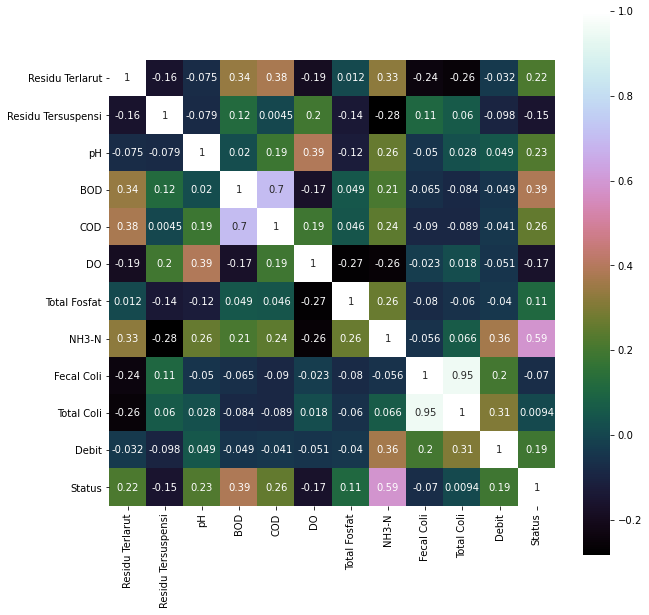

In [12]:
## Correlation Plot for the dataframe
plt.figure(figsize = (10, 10))
sns.heatmap(dataframe.corr(), annot=True, cmap = 'cubehelix', square=True, vmax = 1)
plt.show()

In [16]:
## Deciding the x and y variable
x = dataframe.iloc[:,0:10]
y = dataframe.iloc[:, 11]
y = y.astype(int)

In [17]:
x.head()

,Residu Terlarut,Residu Tersuspensi,pH,BOD,COD,DO,Total Fosfat,NH3-N,Fecal Coli,Total Coli
0,82.1,2.5,6.70,4.00,40.0,4.83,0.702,1.230,2400.0,3500.0
1,110.8,164.0,6.85,4.12,31.0,5.71,0.230,0.410,240000.0,240000.0
2,54.2,15.0,7.28,8.00,40.0,4.03,0.197,1.230,24000.0,24000.0
3,120.7,52.0,6.92,2.98,32.0,6.95,0.250,0.223,66000.0,66000.0
4,50.5,2.5,6.94,8.00,40.0,3.22,1.845,1.230,24000.0,24000.0


In [18]:
## Checking for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                  for i in range(len(x.columns))]
print(vif_data)

              Feature        VIF
0     Residu Terlarut   1.681251
1  Residu Tersuspensi   1.890537
2                  pH  32.737285
3                 BOD   5.119548
4                 COD   4.387238
5                  DO  21.052184
6        Total Fosfat   1.941588
7               NH3-N   5.574336
8          Fecal Coli  26.376975
9          Total Coli  28.277985


In [19]:
## Removing the variables with high VIF value
x = x.drop('pH', axis=1)
x = x.drop('Total Coli', axis=1)

In [20]:
## Checking for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                  for i in range(len(x.columns))]
print(vif_data)

              Feature       VIF
0     Residu Terlarut  1.578096
1  Residu Tersuspensi  1.875829
2                 BOD  4.001448
3                 COD  3.450457
4                  DO  3.812352
5        Total Fosfat  1.769596
6               NH3-N  3.392016
7          Fecal Coli  1.935437


Dengan menghapus variabel sebelumnya, terlihat sekarang nilai VIF berada di bawah 5, yang menunjukkan multikolinearitas rendah.

# Data Splitting

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 63, stratify=y)

In [22]:
## Check total of test and training data
len(x_train)

84

In [23]:
len(x_test)

36

# Data Modelling

## 1st Model: Naive Bayes

In [24]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [25]:
yhat_train = nb.predict(x_train)
yhat_train

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [26]:
cm_train_nb = confusion_matrix(y_train,yhat_train)
print(cm_train_nb)

[[21  0]
 [12 51]]


In [27]:
print(classification_report(yhat_train, y_train))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        33
           1       0.81      1.00      0.89        51

    accuracy                           0.86        84
   macro avg       0.90      0.82      0.84        84
weighted avg       0.88      0.86      0.85        84



In [28]:
yhat_test = nb.predict(x_test)
yhat_test

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [29]:
cm_test = confusion_matrix(y_test,yhat_test)
cm_test

array([[ 7,  2],
       [ 7, 20]], dtype=int64)

In [30]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61         9
           1       0.91      0.74      0.82        27

    accuracy                           0.75        36
   macro avg       0.70      0.76      0.71        36
weighted avg       0.81      0.75      0.76        36



### Hyperparameter Tuning

In [34]:
cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3, 
                                    random_state=999)

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [35]:
## Param Tuning using Grid Search Method
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=cv_method, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
GaussianNB()


In [39]:
print(nbModel_grid.best_params_)

{'var_smoothing': 1e-09}


In [40]:
# Predict Train After Tuning
y_pred = nbModel_grid.predict(x_train)
cm_train = confusion_matrix(y_train,y_pred)
cm_train

array([[21,  0],
       [12, 51]], dtype=int64)

In [41]:
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        33
           1       0.81      1.00      0.89        51

    accuracy                           0.86        84
   macro avg       0.90      0.82      0.84        84
weighted avg       0.88      0.86      0.85        84



In [42]:
# Predict Test After Tuning
y_pred = nbModel_grid.predict(x_test)
print(y_pred)

[1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1]


In [43]:
cm_test = confusion_matrix(y_test,y_pred)
cm_test

array([[ 7,  2],
       [ 7, 20]], dtype=int64)

In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.74      0.91      0.82        22

    accuracy                           0.75        36
   macro avg       0.76      0.70      0.71        36
weighted avg       0.76      0.75      0.74        36



## 2nd Model: KNN

In [46]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
yp_train = knn.predict(x_train)

In [48]:
cm_train = confusion_matrix(y_train, yp_train)
print(cm_train)

[[10 11]
 [ 3 60]]


In [49]:
# Classification Report KNN on Training before Tuning
print(classification_report(yp_train, y_train))

              precision    recall  f1-score   support

           0       0.48      0.77      0.59        13
           1       0.95      0.85      0.90        71

    accuracy                           0.83        84
   macro avg       0.71      0.81      0.74        84
weighted avg       0.88      0.83      0.85        84



In [50]:
yp_test = knn.predict(x_test)
yp_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [51]:
cm_test = confusion_matrix(y_test, yp_test)
print(cm_test)

[[ 2  7]
 [ 5 22]]


In [53]:
print(classification_report(yp_test, y_test))

              precision    recall  f1-score   support

           0       0.22      0.29      0.25         7
           1       0.81      0.76      0.79        29

    accuracy                           0.67        36
   macro avg       0.52      0.52      0.52        36
weighted avg       0.70      0.67      0.68        36



### Hyperparameter Tuning

In [54]:
## List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
## Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

## Create tuned KNN Model
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(x,y)

In [55]:
## Param Tuning using Grid Search Method
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


In [56]:
knn_fit = KNeighborsClassifier(n_neighbors = 1)
knn_fit.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [57]:
yp_train = knn_fit.predict(x_train)
cm_train = confusion_matrix(y_train, yp_train)
print(cm_train)

[[21  0]
 [ 0 63]]


In [58]:
print(classification_report(yp_train, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        63

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [59]:
yp_test = knn_fit.predict(x_test)
cm_test = confusion_matrix(y_test, yp_test)
print(cm_test)

[[ 6  3]
 [ 2 25]]


In [60]:
print(classification_report(yp_test, y_test))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.93      0.89      0.91        28

    accuracy                           0.86        36
   macro avg       0.80      0.82      0.81        36
weighted avg       0.87      0.86      0.86        36

